In [1]:
import os

import pandas as pd
import seaborn as sns

import bandit.environment as env
from bandit.logistic import (
    EpsilonGreedyLogisticBandit,
    EpsilonGreedyLogisticPerArmBandit,
    SoftmaxLogisticBandit,
    SoftmaxLogisticPerArmBandit,
)
from bandit.neural_bandit import (
    EpsilonGreedyNeuralBandit,
    EpsilonGreedyNeuralPerArmBandit,
    SoftmaxNeuralBandit,
    SoftmaxNeuralPerArmBandit,
)
from bandit.tree import (
    EpsilonGreedyTreeBandit,
    EpsilonGreedyTreePerArmBandit,
    SoftmaxTreeBandit,
    SoftmaxTreePerArmBandit,
)

sns.set_theme()

In [2]:
import importlib

import bandit

importlib.reload(bandit.neural_bandit)
importlib.reload(bandit.logistic)

<module 'bandit.logistic' from '/Users/alextanhongpin/Documents/python/python-bandit/bandit/logistic.py'>

In [3]:
class ContextualEpsilonGreedyNeuralBandit(EpsilonGreedyNeuralBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state: dict[str, str], action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualEpsilonGreedyNeuralPerArmBandit(EpsilonGreedyNeuralPerArmBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(len(actions), epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualEpsilonGreedyLogisticBandit(EpsilonGreedyLogisticBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state: dict[str, str], action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualEpsilonGreedyLogisticPerArmBandit(EpsilonGreedyLogisticPerArmBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(len(actions), epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.one_hot_encode(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualEpsilonGreedyTreeBandit(EpsilonGreedyTreeBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state: dict[str, str], action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualEpsilonGreedyTreePerArmBandit(EpsilonGreedyTreePerArmBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(len(actions), epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.one_hot_encode(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)

In [4]:
class ContextualSoftmaxNeuralBandit(SoftmaxNeuralBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state, action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxNeuralPerArmBandit(SoftmaxNeuralPerArmBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(len(actions), temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxLogisticBandit(SoftmaxLogisticBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state, action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxLogisticPerArmBandit(SoftmaxLogisticPerArmBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(len(actions), temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.one_hot_encode(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxLogisticBandit(SoftmaxLogisticBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state, action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxTreePerArmBandit(SoftmaxTreePerArmBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(len(actions), temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.one_hot_encode(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxTreeBandit(SoftmaxTreeBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state, action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)

In [5]:
N = 5_000
file_name = "contextual_bandit.csv"
if not os.path.exists(file_name):
    df = pd.DataFrame(index=range(N))
    df.to_csv(file_name)
else:
    df = pd.read_csv(file_name)
df.head()

,ContextualEpsilonGreedyNeuralBandit_1.0,ContextualEpsilonGreedyNeuralBandit_0.9,ContextualEpsilonGreedyNeuralPerArmBandit_1.0,ContextualEpsilonGreedyNeuralPerArmBandit_0.9,ContextualSoftmaxNeuralBandit_0.2,ContextualSoftmaxNeuralBandit_0.5,ContextualSoftmaxNeuralPerArmBandit_0.2,ContextualSoftmaxNeuralPerArmBandit_0.5,ContextualEpsilonGreedyLogisticBandit_1.0,ContextualEpsilonGreedyLogisticBandit_0.9,ContextualSoftmaxLogisticBandit_0.2,ContextualSoftmaxLogisticBandit_0.5,ContextualEpsilonGreedyTreeBandit_1.0,ContextualEpsilonGreedyTreeBandit_0.9,ContextualSoftmaxTreeBandit_0.2,ContextualSoftmaxTreeBandit_0.5
0,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.00,1.000000,1.000000,0.00,0.000000
1,0.500000,0.500000,0.500000,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.500000,0.500000,0.00,0.000000
2,0.666667,0.666667,0.666667,0.0,0.333333,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.666667,0.666667,0.00,0.333333
3,0.750000,0.750000,0.500000,0.0,0.500000,0.0,0.0,0.25,0.0,0.0,0.0,0.25,0.750000,0.750000,0.25,0.250000
4,0.800000,0.800000,0.400000,0.0,0.600000,0.0,0.0,0.20,0.0,0.0,0.2,0.20,0.800000,0.800000,0.20,0.400000


In [6]:
def run_simulation(model):
    total_reward = 0
    avg_rewards = []

    for i, ctx in env.random_context(N, random_state=42):
        # 1. Predict the action.
        action = model.predict(ctx)

        # 2. Act and get the reward.
        reward = env.get_cost(ctx, action)

        # 3. Update the model.
        model.fit(ctx, action, reward)

        # 4. Save the reward.
        total_reward += max(0, reward)
        avg_rewards.append(total_reward / (i + 1))
    return avg_rewards, total_reward

In [7]:
models = [
    # EpsilonGreedy.
    ContextualEpsilonGreedyNeuralBandit(env.actions, epsilon=1.0),
    ContextualEpsilonGreedyNeuralBandit(env.actions, epsilon=0.9),
    ContextualEpsilonGreedyNeuralPerArmBandit(env.actions, epsilon=1.0),
    ContextualEpsilonGreedyNeuralPerArmBandit(env.actions, epsilon=0.9),
    ContextualEpsilonGreedyLogisticBandit(env.actions, epsilon=1.0),
    ContextualEpsilonGreedyLogisticBandit(env.actions, epsilon=0.9),
    ContextualEpsilonGreedyLogisticPerArmBandit(env.actions, epsilon=1.0),
    ContextualEpsilonGreedyLogisticPerArmBandit(env.actions, epsilon=0.9),
    ContextualEpsilonGreedyTreeBandit(env.actions, epsilon=1.0),
    ContextualEpsilonGreedyTreeBandit(env.actions, epsilon=0.9),
    ContextualEpsilonGreedyTreePerArmBandit(env.actions, epsilon=1.0),
    ContextualEpsilonGreedyTreePerArmBandit(env.actions, epsilon=0.9),
    # Softmax.
    ContextualSoftmaxNeuralBandit(env.actions, temperature=0.2),
    ContextualSoftmaxNeuralBandit(env.actions, temperature=0.5),
    ContextualSoftmaxNeuralPerArmBandit(env.actions, temperature=0.2),
    ContextualSoftmaxNeuralPerArmBandit(env.actions, temperature=0.5),
    ContextualSoftmaxLogisticBandit(env.actions, temperature=0.2),
    ContextualSoftmaxLogisticBandit(env.actions, temperature=0.5),
    ContextualSoftmaxLogisticPerArmBandit(env.actions, temperature=0.2),
    ContextualSoftmaxLogisticPerArmBandit(env.actions, temperature=0.5),
    ContextualSoftmaxTreeBandit(env.actions, temperature=0.2),
    ContextualSoftmaxTreeBandit(env.actions, temperature=0.5),
    ContextualSoftmaxTreePerArmBandit(env.actions, temperature=0.2),
    ContextualSoftmaxTreePerArmBandit(env.actions, temperature=0.5),
]
# TODO: Benchmark time.
for model in models:
    if (name := model.__name__) in df:
        print("skipping", name)
        # if "Logistic" not in name and "Tree" not in name:
        # continue
        continue

    avg_rewards, total_reward = run_simulation(model)
    df[model.__name__] = avg_rewards
    print(model.__name__, "total_reward", total_reward)
    df.to_csv(file_name, index=False)

skipping ContextualEpsilonGreedyNeuralBandit_1.0
skipping ContextualEpsilonGreedyNeuralBandit_0.9
skipping ContextualEpsilonGreedyNeuralPerArmBandit_1.0
skipping ContextualEpsilonGreedyNeuralPerArmBandit_0.9
skipping ContextualEpsilonGreedyLogisticBandit_1.0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:22<00:00, 60.96it/s]


ContextualEpsilonGreedyLogisticBandit_1.0 total_reward 2539.0
skipping ContextualEpsilonGreedyLogisticBandit_0.9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:27<00:00, 57.44it/s]


ContextualEpsilonGreedyLogisticBandit_0.9 total_reward 2357.0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:08<00:00, 576.68it/s]


ContextualEpsilonGreedyLogisticPerArmBandit_1.0 total_reward 1259.0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:13<00:00, 383.50it/s]


ContextualEpsilonGreedyLogisticPerArmBandit_0.9 total_reward 2476.0
skipping ContextualEpsilonGreedyTreeBandit_1.0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:31<00:00, 158.98it/s]


ContextualEpsilonGreedyTreeBandit_1.0 total_reward 2530.0
skipping ContextualEpsilonGreedyTreeBandit_0.9


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:41<00:00, 120.53it/s]


ContextualEpsilonGreedyTreeBandit_0.9 total_reward 4567.0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:09<00:00, 548.29it/s]


ContextualEpsilonGreedyTreePerArmBandit_1.0 total_reward 3720.0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:09<00:00, 523.69it/s]


ContextualEpsilonGreedyTreePerArmBandit_0.9 total_reward 4521.0
skipping ContextualSoftmaxNeuralBandit_0.2
skipping ContextualSoftmaxNeuralBandit_0.5
skipping ContextualSoftmaxNeuralPerArmBandit_0.2
skipping ContextualSoftmaxNeuralPerArmBandit_0.5
skipping ContextualSoftmaxLogisticBandit_0.2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:48<00:00, 46.21it/s]


ContextualSoftmaxLogisticBandit_0.2 total_reward 2056.0
skipping ContextualSoftmaxLogisticBandit_0.5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:27<00:00, 57.19it/s]


ContextualSoftmaxLogisticBandit_0.5 total_reward 2068.0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:14<00:00, 346.88it/s]


ContextualSoftmaxLogisticPerArmBandit_0.2 total_reward 3071.0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:12<00:00, 403.57it/s]


ContextualSoftmaxLogisticPerArmBandit_0.5 total_reward 2269.0
skipping ContextualSoftmaxTreeBandit_0.2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:36<00:00, 136.61it/s]


ContextualSoftmaxTreeBandit_0.2 total_reward 4957.0
skipping ContextualSoftmaxTreeBandit_0.5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:44<00:00, 112.41it/s]


ContextualSoftmaxTreeBandit_0.5 total_reward 4491.0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:09<00:00, 514.03it/s]


ContextualSoftmaxTreePerArmBandit_0.2 total_reward 4830.0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:07<00:00, 667.51it/s]


ContextualSoftmaxTreePerArmBandit_0.5 total_reward 3114.0


In [8]:
# Override
# You will get unnamed columns if saved with index=True
# df[[col for col in df.columns if 'Unnamed' not in col]]
# df.to_csv(file_name, index=False)

In [30]:
def plot(*patterns):
    cols = df.columns
    for pat in patterns:
        cols = list(filter(lambda col: pat in col, cols))

    style = []
    for col in cols:
        if "NeuralBandit" in col:
            style.append("-")
        elif "NeuralBanditPerArm" in col:
            style.append(":")
        elif "Tree" in col:
            style.append("--")
        elif "Logistic" in col:
            style.append("-.")
        else:
            style.append("-")
    df[cols].plot(
        figsize=(12, 8),
        style=style,
        xlabel="Trials",
        ylabel="Avg. Rewards",
        title="Contextual Bandit",
    )

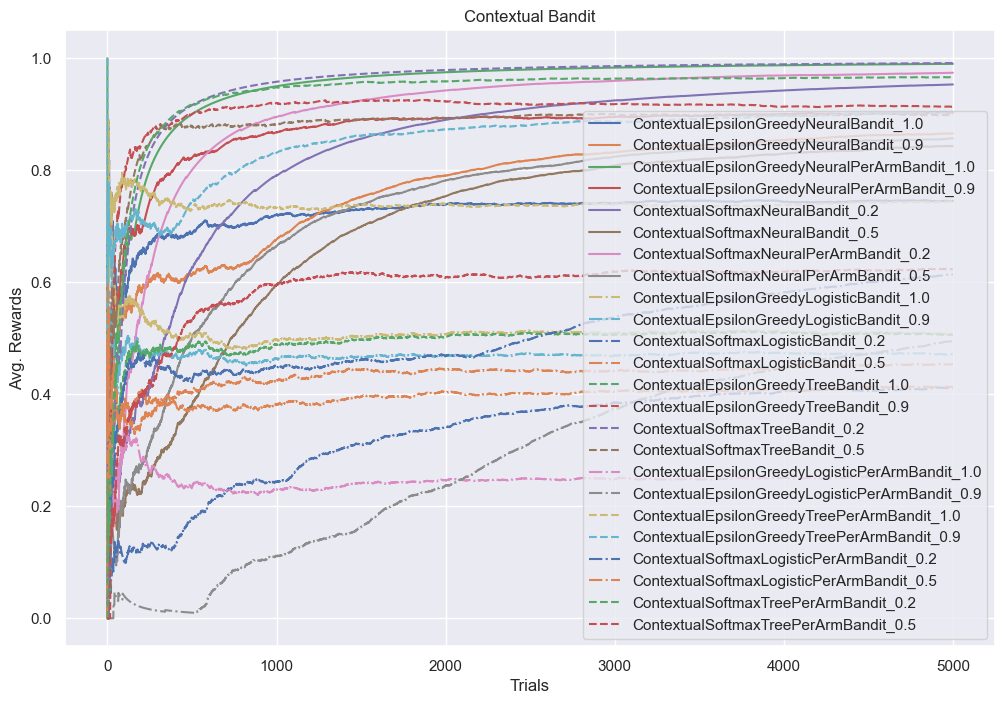

In [31]:
plot()

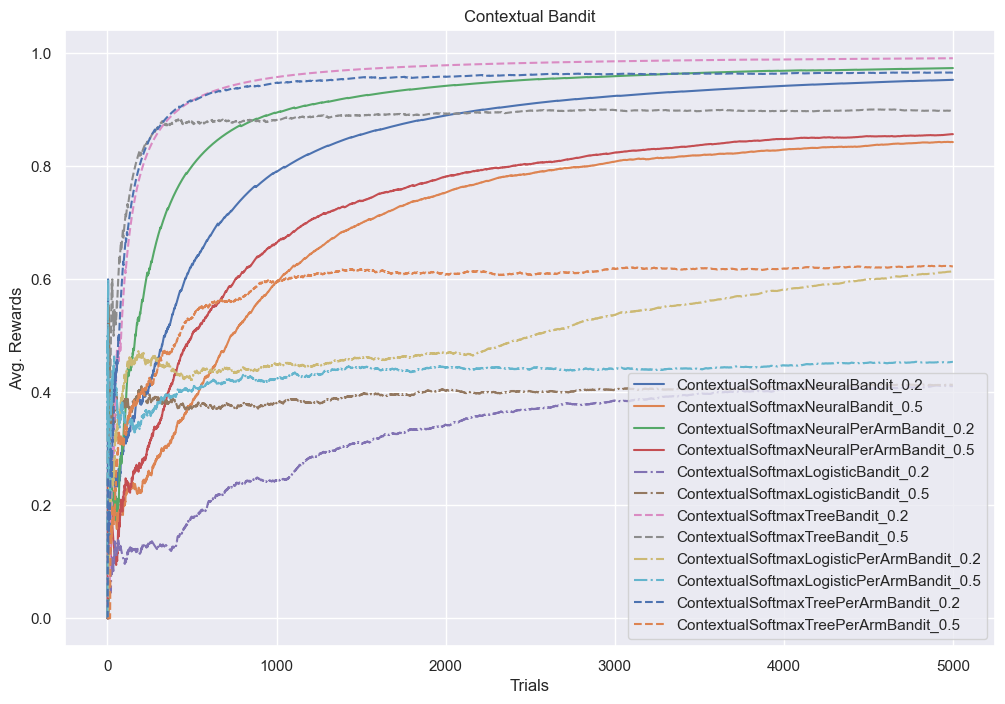

In [32]:
plot("Softmax")

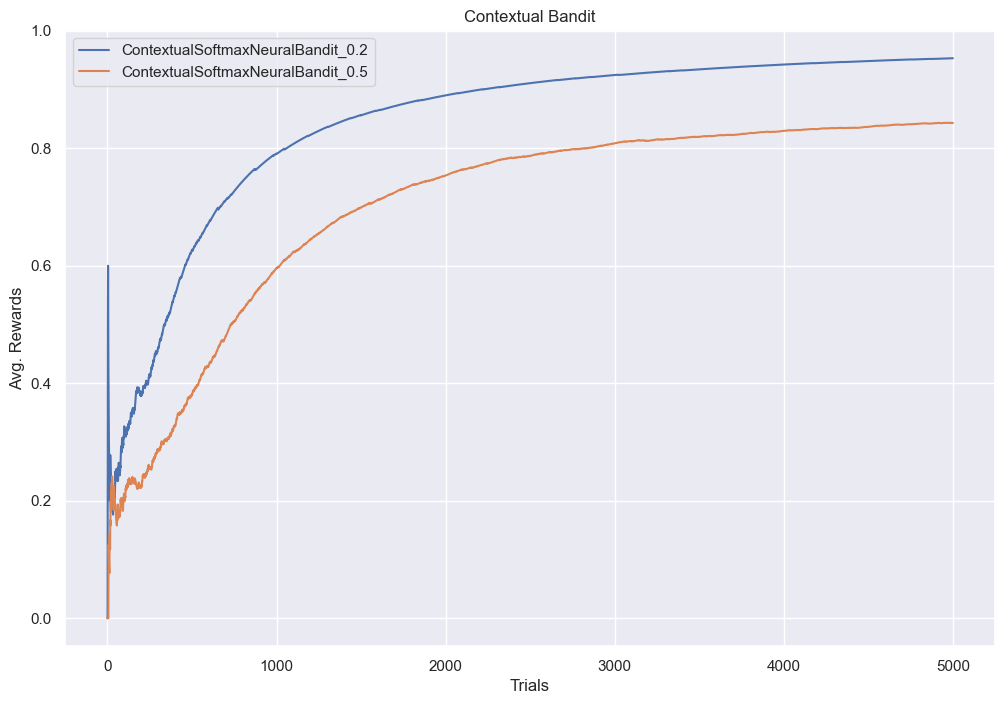

In [33]:
plot("SoftmaxNeuralBandit")

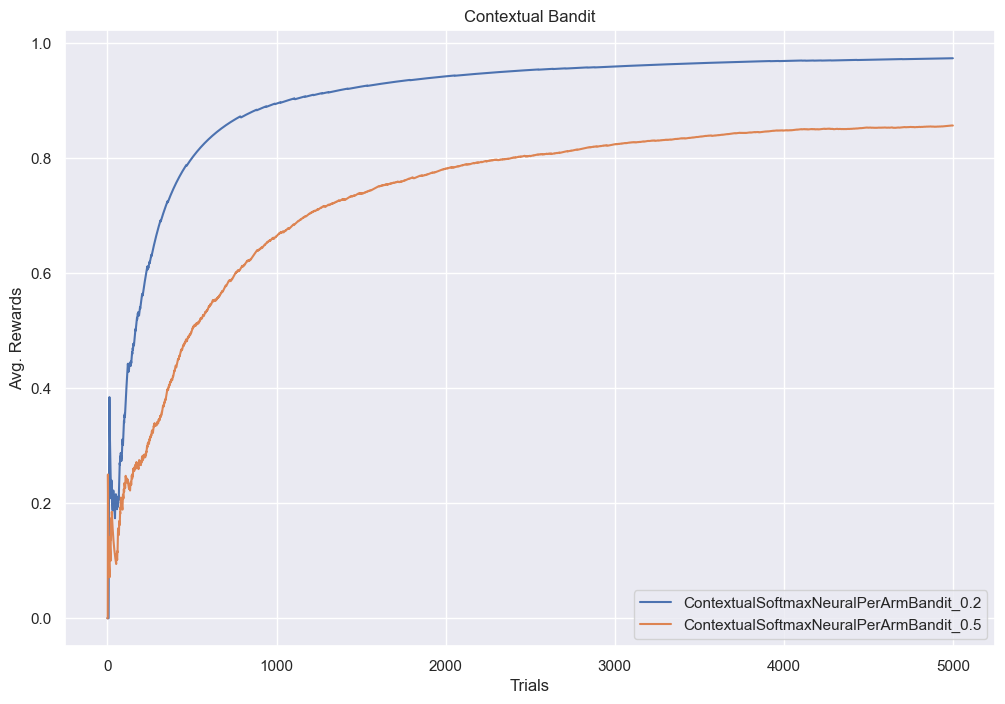

In [34]:
plot("SoftmaxNeuralPerArmBandit")

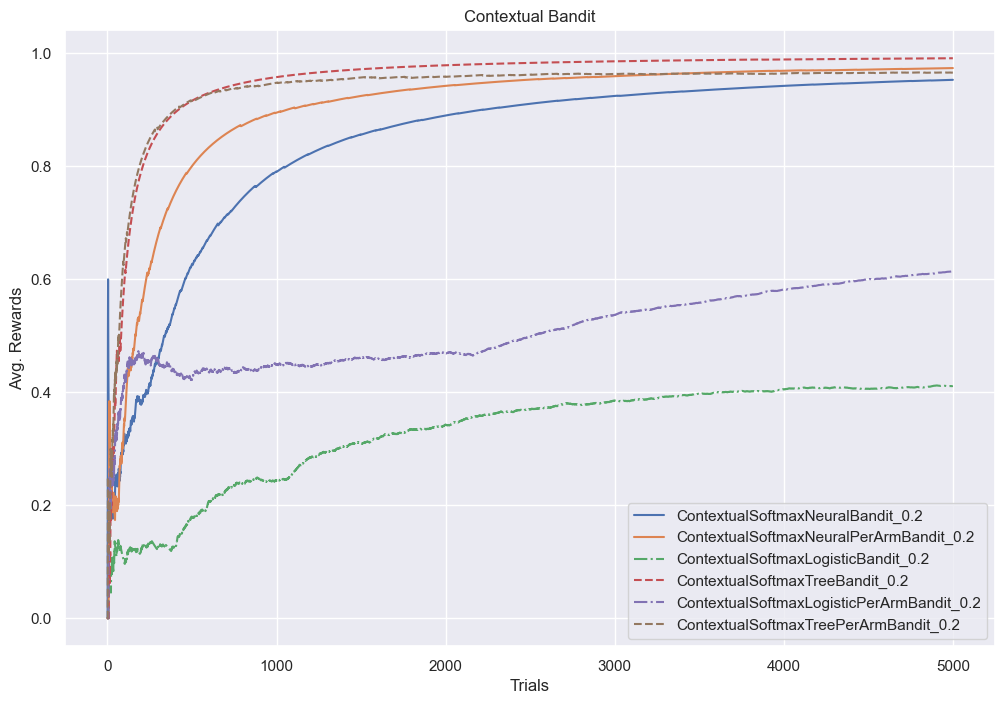

In [35]:
plot("Softmax", "0.2")

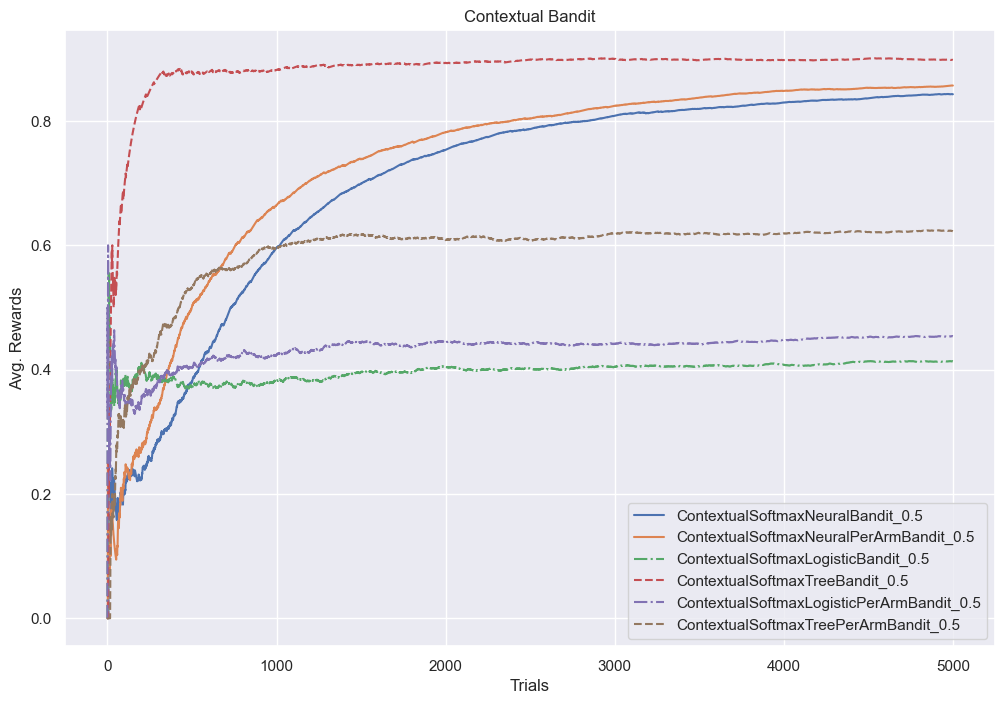

In [36]:
plot("Softmax", "0.5")

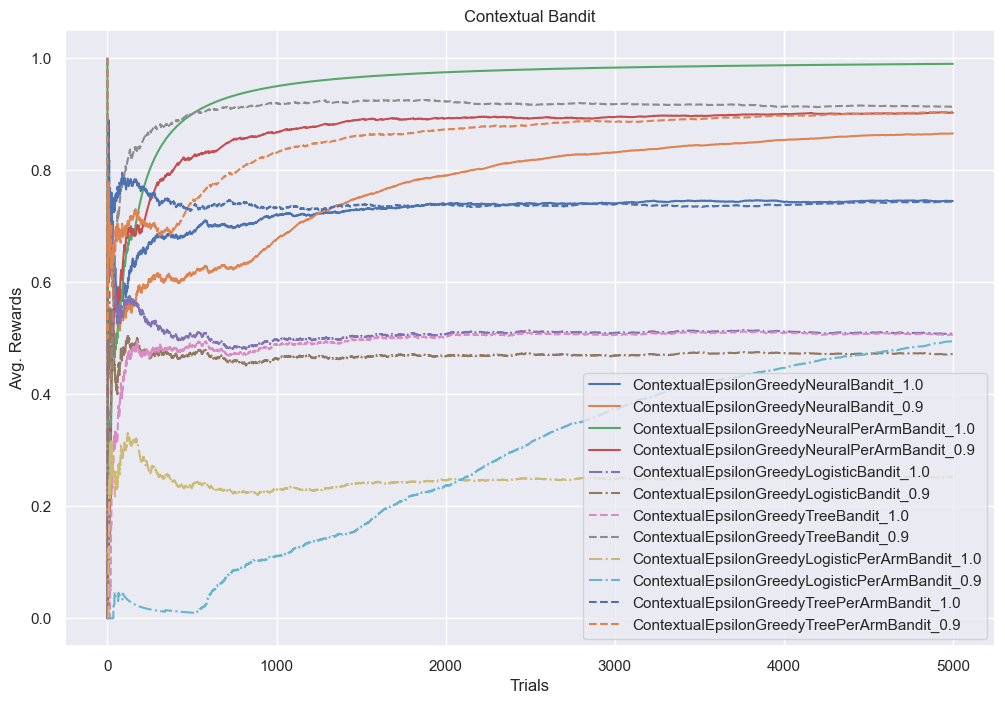

In [37]:
plot("Greedy")

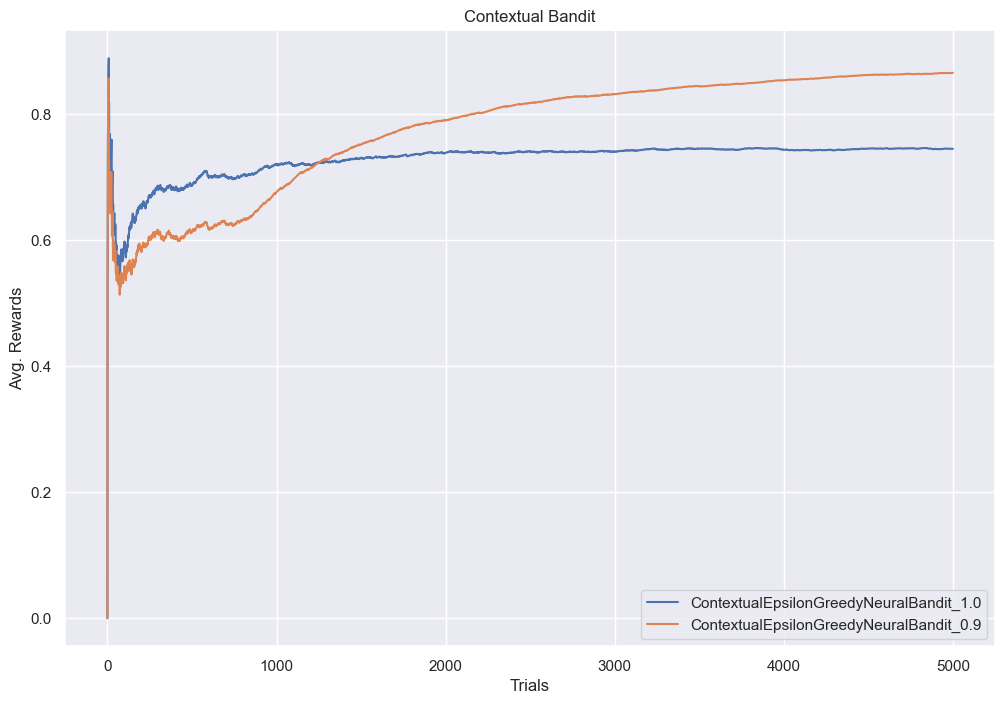

In [38]:
plot("GreedyNeuralBandit")

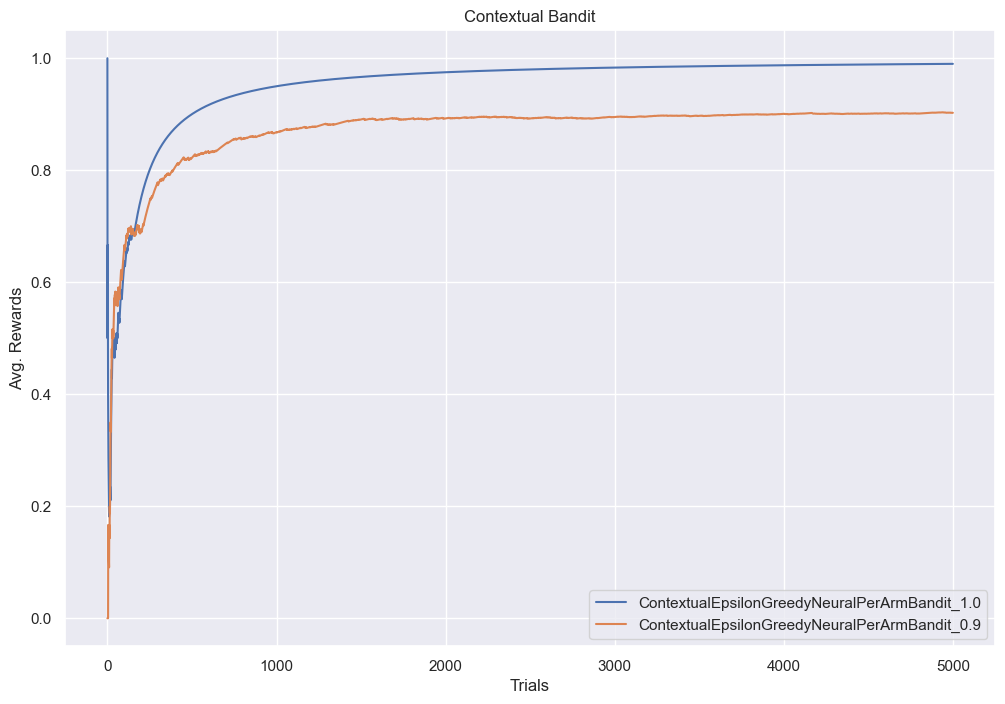

In [39]:
plot("GreedyNeuralPerArmBandit")

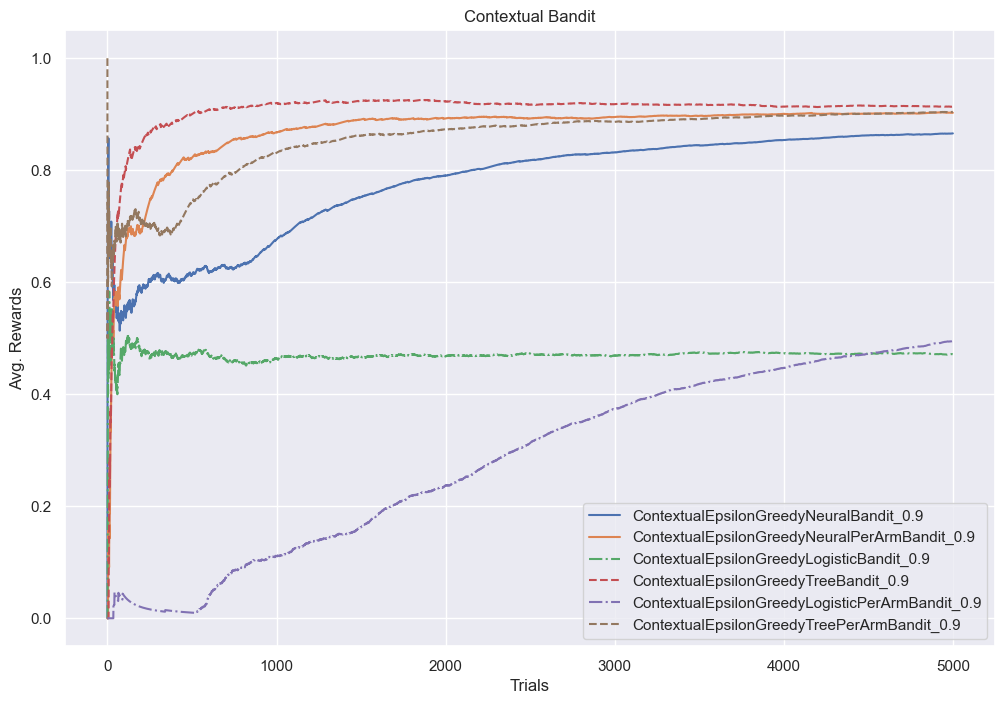

In [40]:
plot("Greedy", "0.9")

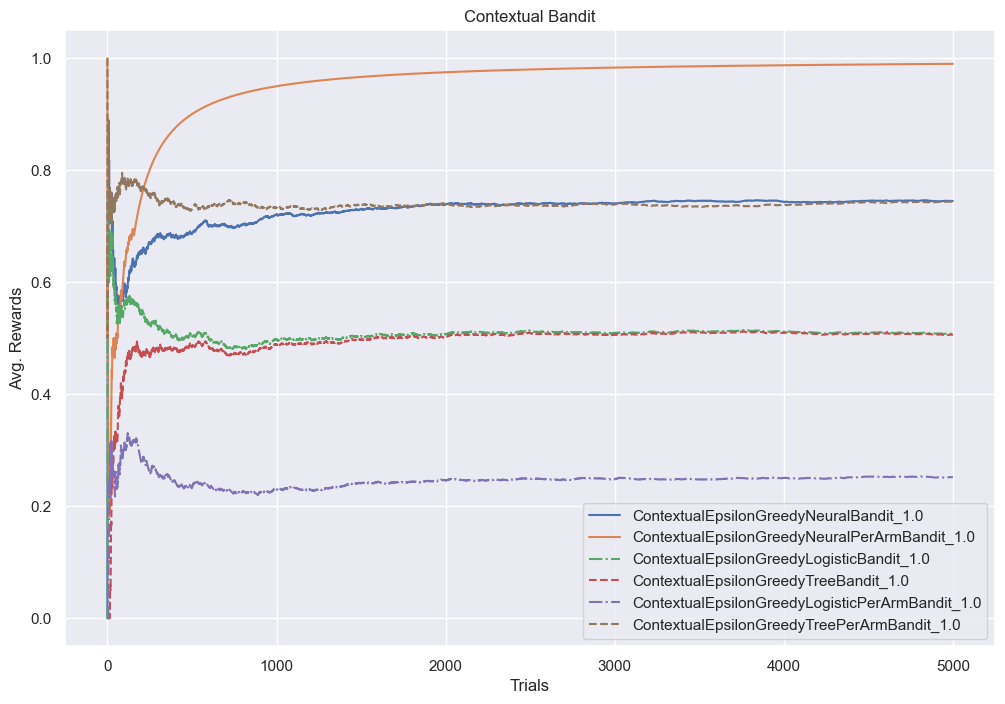

In [41]:
plot("Greedy", "1.0")

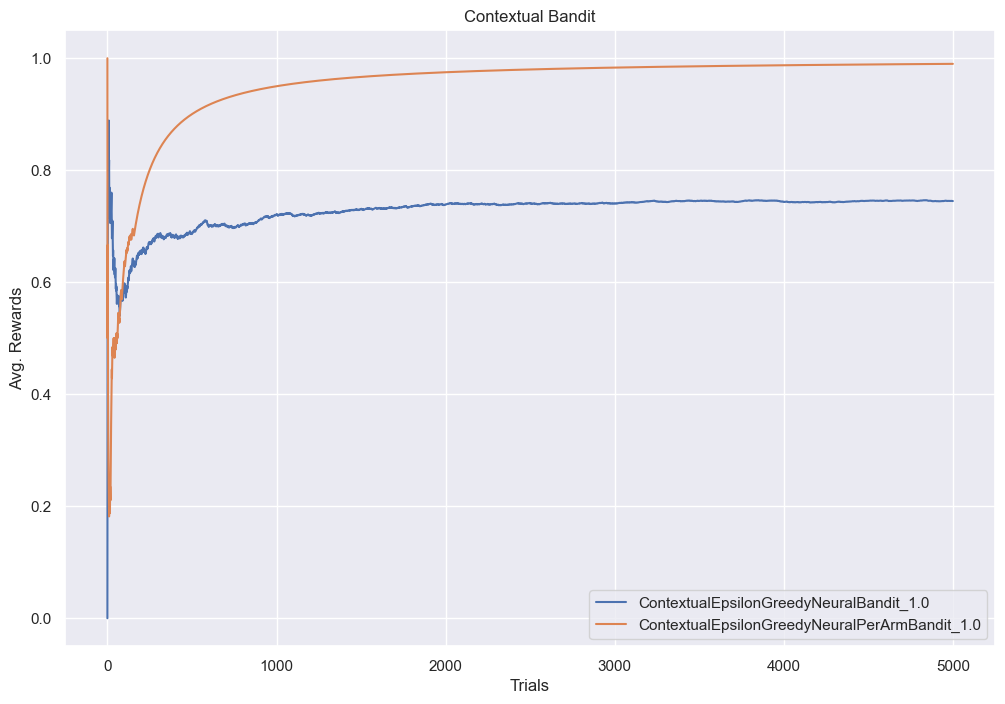

In [42]:
plot("GreedyNeural", "1.0")

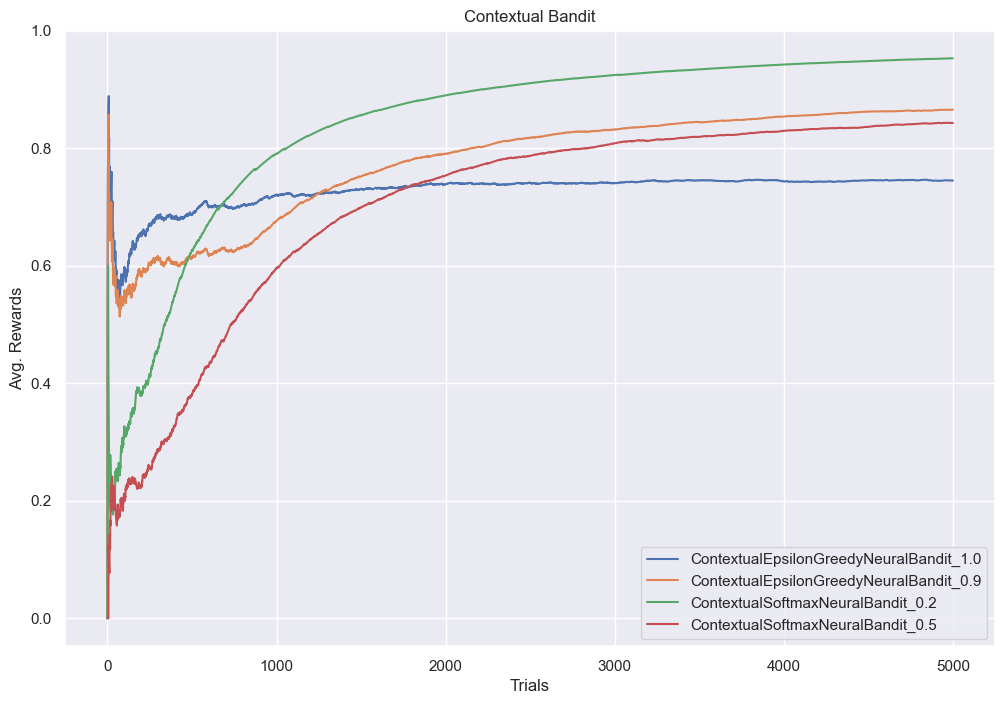

In [43]:
plot("NeuralBandit")

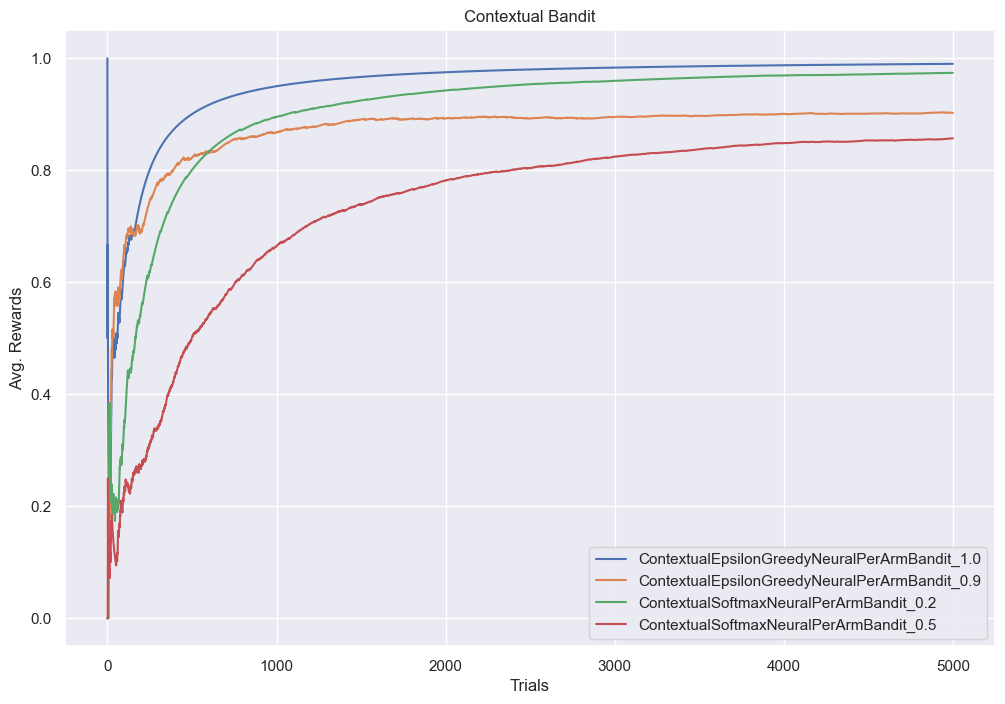

In [44]:
plot("NeuralPerArmBandit")

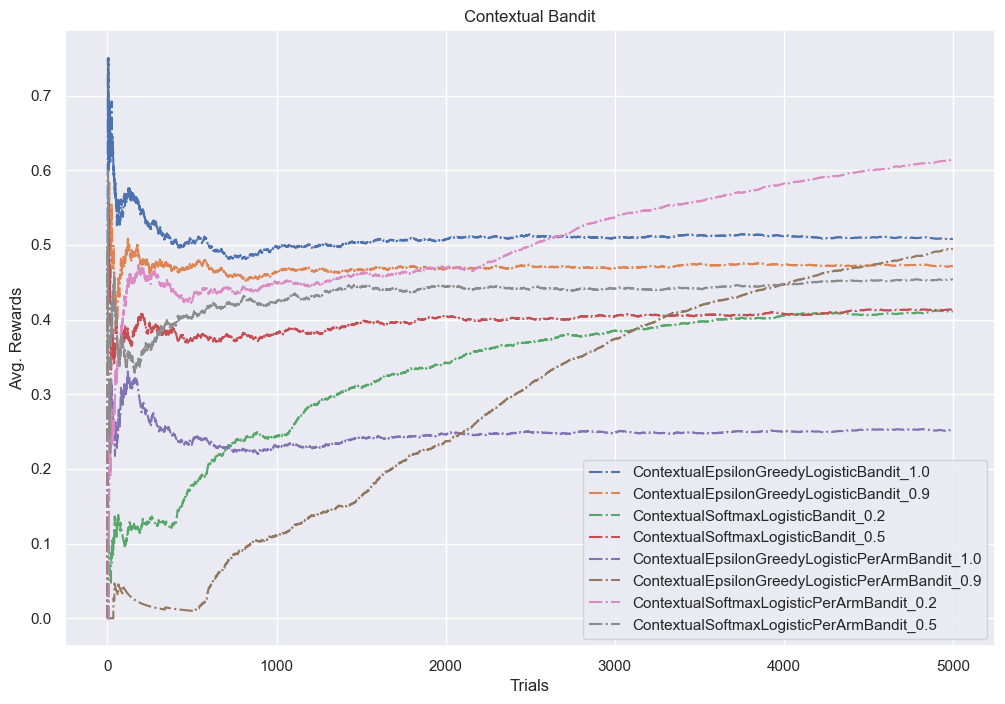

In [48]:
plot("Logistic")

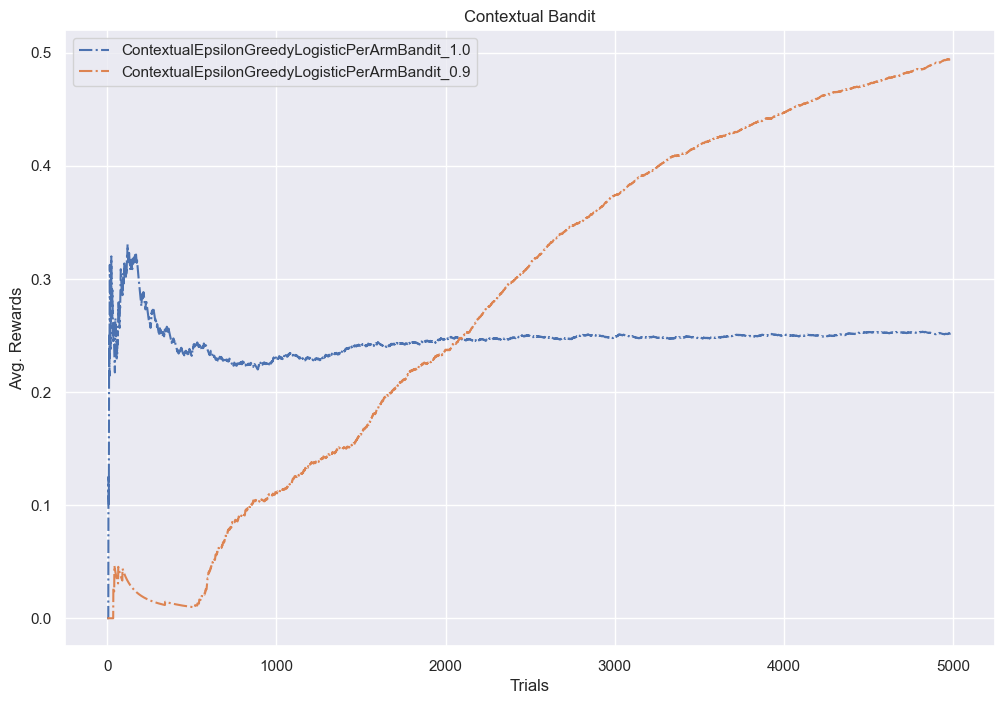

In [51]:
plot("Logistic", "Epsilon", "PerArm")

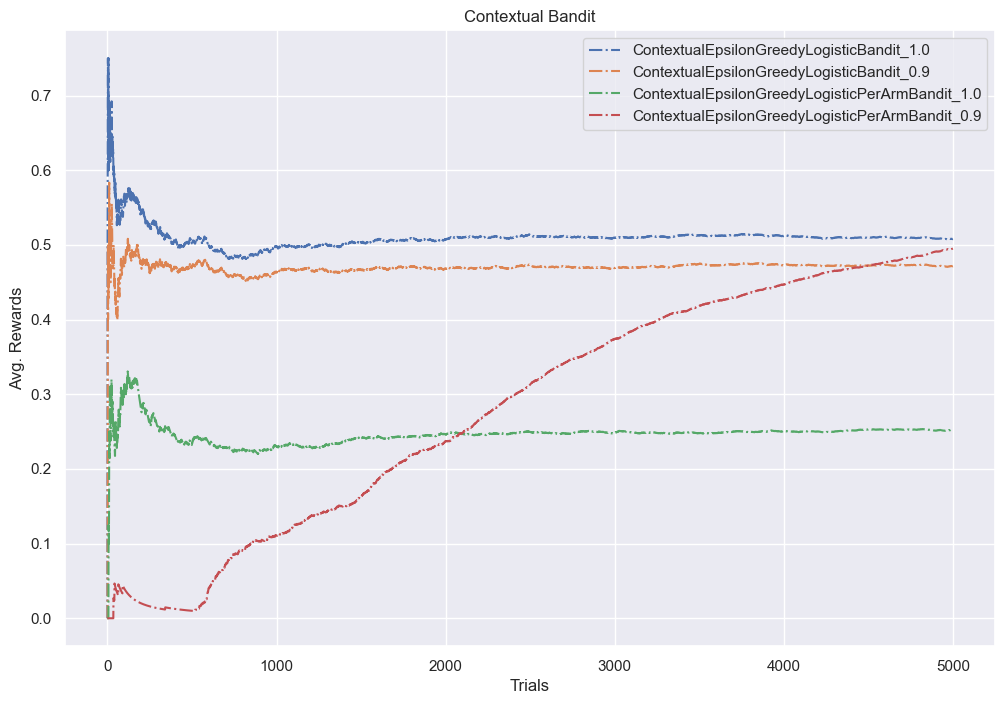

In [52]:
plot("Logistic", "Epsilon")

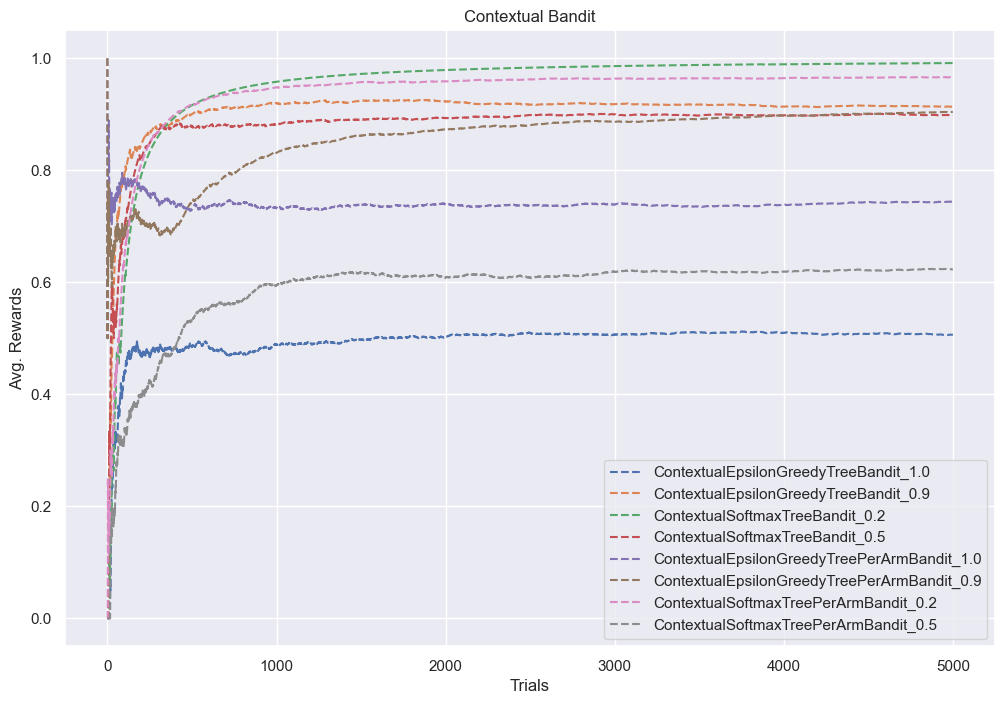

In [46]:
plot("Tree")

In [47]:
model = models[-1]
# model = ContextualEpsilonGreedyTreeBandit(env.actions, epsilon=0.9)

# _, total_reward = run_simulation(model)
# total_reward
model.models

[DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor()]

In [27]:
ctx = {"user": "Tom", "time_of_day": "morning"}
# 1. Predict the action.
action = model.predict(ctx)

# 2. Act and get the reward.
reward = env.get_cost(ctx, action)
print("Context:", ctx)
print("Action:", action)
print("Reward:", reward)

Context: {'user': 'Tom', 'time_of_day': 'morning'}
Action: politics
Reward: 1.0
